In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("archive/aug_train.csv")

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

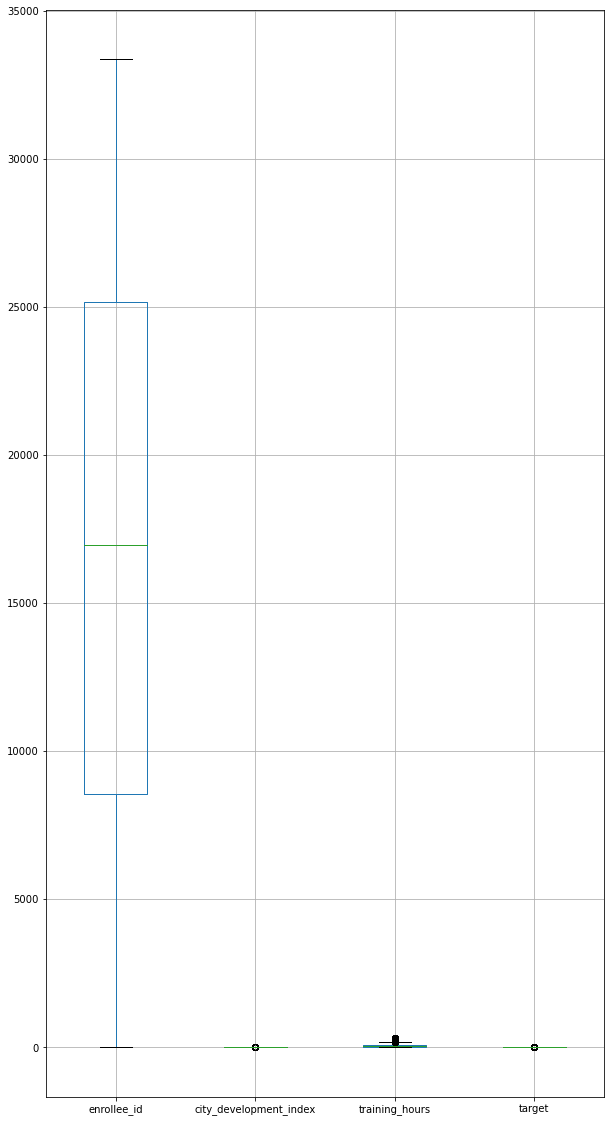

In [5]:
df.boxplot(figsize=(10, 20))


In [6]:
for i in df["experience"]:
    if(i==">20"):
        df["experience"][df["experience"]==i]=20
    if(i == "<1"):
        df["experience"][df["experience"]==i]=0


df["experience"] = df["experience"].fillna(0)
df["experience"] = df['experience'].astype('int')

df["experience"].unique()

<ipython-input-6-10066903b226>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experience"][df["experience"]==i]=20
<ipython-input-6-10066903b226>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experience"][df["experience"]==i]=0


array([20, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8])

In [7]:
df['gender'] = df['gender'].fillna("Undefined")
df["education_level"]=df["education_level"].fillna("Undefined")
df["major_discipline"].fillna(value="Undefined", inplace=True)
df["experience"] = df["experience"].fillna(df["experience"].mean())
df["company_type"] = df["company_type"].fillna("Undefined")


123

In [46]:
for i in df["company_size"]:
    if(i=="10/49"):
        df["company_size"][df["company_size"]==i]="10-49"
    if(i == "<10"):
        df["company_size"][df["company_size"]==i]="1-9"
    if(i == "10000+"):
        df["company_size"][df["company_size"]==i]="10000-100000"

df["company_size"] = df["company_size"].fillna("0-0")

new = df['company_size'].str.split("-", expand = True) 
df['company_size_min']= new[0]
df['company_size_max']= new[1] 
df["company_size_max"] = df['company_size_max'].astype('int')
df["company_size_min"] = df['company_size_min'].astype('int')
df.drop(columns=['company_size'])

df["company_size_min"].unique()
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_size_min,company_size_max
0,8949,103,0.920,543.071195,1,no_enrollment,Graduate,STEM,20,0-0,Unknown,1,36,1.0,0,0
1,29725,40,0.776,661.028774,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0,50,99
2,11561,21,0.624,737.175593,0,Full time course,Graduate,STEM,5,0-0,Unknown,0,83,0.0,0,0
4,666,162,0.767,15.467610,1,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0,50,99
5,21651,176,0.764,970.132799,1,Part time course,Graduate,STEM,11,0-0,Unknown,1,24,1.0,0,0


In [31]:
for i in df["last_new_job"]:
    if(i==">4"):
        df["last_new_job"][df["last_new_job"]==i]=5
    if(i == "never"):
        df["last_new_job"][df["last_new_job"]==i]=0

df["last_new_job"] = df["last_new_job"].fillna(0)       

df["last_new_job"] = df['last_new_job'].astype('int')
df["last_new_job"].unique()

array([1, 5, 0, 4, 3, 2])

In [36]:
for i in range(len(df["city"])):
    df["city"][i] = df["city"][i].replace("city_","")

df["city"] = df['city'].astype('int')
df["city"].unique()  


<ipython-input-36-5b4729ae89e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["city"][i] = df["city"][i].replace("city_","")


array([103,  40,  21, 115, 162, 176, 160,  46,  61, 114,  13, 159, 102,
        67, 100,  16,  71, 104,  64, 101,  83, 105,  73,  75,  41,  11,
        93,  90,  36,  20,  57, 152,  19,  65,  74, 173, 136,  98,  97,
        50, 138,  82, 157,  89, 150,  70, 175,  94,  28,  59, 165, 145,
       142,  26,  12,  37,  43, 116,  23,  99, 149,  10,  45,  80, 128,
       158, 123,   7,  72, 106, 143,  78, 109,  24, 134,  48, 144,  91,
       146, 133, 126, 118,   9, 167,  27,  84,  54,  39,  79,  76,  77,
        81, 131,  44, 117, 155,  33, 141, 127,  62,  53,  25,   2,  69,
       120, 111,  30,   1, 140, 179,  55,  14,  42, 107,  18, 139, 180,
       166, 121, 129,   8,  31, 171])

In [41]:
for i in df["relevent_experience"]:
    if(i == "Has relevent experience"):
        df["relevent_experience"][df["relevent_experience"]==i]=1
    if(i == "No relevent experience"):
        df["relevent_experience"][df["relevent_experience"]==i]=0
df["relevent_experience"].unique()

<ipython-input-41-5c4290659ddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relevent_experience"][df["relevent_experience"]==i]=1
<ipython-input-41-5c4290659ddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relevent_experience"][df["relevent_experience"]==i]=0


array([1, 0], dtype=object)

In [43]:
df = df.dropna(subset=['enrolled_university'])

In [44]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size_min          0
company_size_max          0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18772 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18772 non-null  int64  
 1   city                    18772 non-null  int64  
 2   city_development_index  18772 non-null  float64
 3   gender                  18772 non-null  float64
 4   relevent_experience     18772 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18772 non-null  object 
 7   major_discipline        18772 non-null  object 
 8   experience              18772 non-null  int64  
 9   company_size            18772 non-null  object 
 10  company_type            18772 non-null  object 
 11  last_new_job            18772 non-null  int64  
 12  training_hours          18772 non-null  int64  
 13  target                  18772 non-null  float64
 14  company_size_min        18772 non-null

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)